<a href="https://colab.research.google.com/github/yoohw0317/DAP__/blob/main/DAP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
from wordcloud import WordCloud 

In [21]:
df = pd.read_excel("https://github.com/yoohw0317/DAPproject/blob/main/data.xlsx?raw=true")
df = df[['score', 'review']]
df.dropna
df

,score,review
0,5,11/26~27일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다....
1,2,숙박 바우처가 생겨서 11월 24일 투숙을 했습니다.일이 생겨서 저녁 7시쯤 늦게 ...
2,5,모든것이 좋았습니다.다만 욕조 물빠지는 소리가 좀 거슬리긴 했어요그거 외에는 인생에...
3,5,"엄마랑 처음 호캉스 간거엿는데 호텔 입구부터 직원분들의 친절함, 그리고 객실 상태 ..."
4,5,결혼 후에 특별한 숙박을 위해 방문했습니다. 최고의 서비스와 시설들로 매우 만족스러...
...,...,...
428,5,"우리는 2박을 묵었는데 서명인 서울. 대부분의 택시 기사가 호텔을 모르는 서명인, ..."
429,5,"우리는 두 개의 절대적으로 환상적인, 잊을 수 없는 일을 서명인. 도착했을 때, 우..."
430,5,다음에도 꼭 이곳에 다시 올 걸지 사용자_이름:. 방에 도착했을 때 제공된 웰컴 드...
431,5,76 층 로비. 시작할 수 있습니다. 룸 92 차 바닥. 환상적인 전망이 다. 매우...


In [22]:
def regularExpression (text):
  exp = re.compile('[^ 가-힣]')
  return exp.sub('', text);

해당 test에 한글을 제외한 모든 것들이 걸러지는지 시험하기 위해 한국어를 제외한 대부분의 모든 것들을 넣어줍니다.

1. 숫자

2. ㅠㅠ ㅋㅋ와 같은 이모티콘

3. .,!와 같은 기호

4. 하트, 별과 같은 이모티콘

In [23]:
test='12월 15일에 테스트 해봅니당...ㅠㅠㅠㅠ 제발 성공하기를 흑ㅠㅠㅠㅠㅠㅠㅠㅠㅎㅎㅎㅎㅎㅎ, plz plz success...!!!!! 다 지워져라 얍★'
regularExpression(test)

'월 일에 테스트 해봅니당 제발 성공하기를 흑    다 지워져라 얍'

해당 환경설정은 사용자에 맞는 환경설정을 사용해야합니다.

그렇지 않으면 상상치도 못한 오류에 직면하게 될 수도 있습니다.

코드 작성자의 환경은 다음과 같습니다.

Python 3.8.8

java 17.0.1 2021-10-19 LTS

Java(TM) SE Runtime Environment (build 17.0.1+12-LTS-39)

Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)

JPype1-1.3.0-cp38-cp38-win_amd64.whl



In [24]:
!apt-get update 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [25]:
from konlpy.tag import Okt
from collections import Counter

만약 에러가 발생한다면 해당 코드에 들어가서 에러가 나는 부분을 지워주면 정상 실행될 때도 있습니다.


이게 무슨소린가 싶겠지만 직접 해본사람은 이해할 수 있습니다.

In [26]:
test = regularExpression(df['review'][0])
test
okt = Okt()
testnouns = okt.nouns(test)
testnouns #정상 추출 확인!

['일', '숙박', '그', '시간', '일', '분', '조만간', '다시', '예약', '가족', '또', '해']

말뭉치를 생성

말뭉치: 자연어처리에서 자연어의 집합

In [27]:
totalCorpus = "".join(df['review'].tolist())
totalCorpus 

'11/26~27일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다.조만간 다시 예약도 하고 가족들이랑 또 가려해요감사합니다!숙박 바우처가 생겨서 11월 24일 투숙을 했습니다.일이 생겨서 저녁 7시쯤 늦게 체크인을 했고체크인 할때 121,000원을 추가하면 한강뷰로 변경이 가능하고프리미어 더블로 룸 업그레이드까지 해준다고 해서 추가 결제를 했습니다.98층으로 배정이 되었고, 늦은시간이라 밥을 먹고 잠들었습니다.문제는 다음날.아침에 일어나 짐을 정리하는데, 제가 베고 잤던 베개에 무언가가 묻어있었습니다.저는 화장을 안하는데, 베개를 뒤집어보니 한쪽면에 까만 곰팡이가 잔뜩 끼었고, 그 베개를 베고 잤습니다.전날 저녁 체크인을 해서 어두워서 방을 전반적으로 보진 않았는데, 순간 너무 소름끼쳐서 방을 구석구석 봤습니다.테이블 다리쪽에 누군가 먹다 흘린 치킨 뼈 같은것도 보입니다.한두푼 하는 호텔도 아닌데, 룸 업그레이드 까지 했는데, 이런 룸 컨디션은 정말 최악이네요.비싼 돈 만큼 뷰는 너무 좋고 친절한 서비스 또한 좋습니다. 하지만 조식 직원과 룸 컨디션은... 좀 별로입니다.이 가격으로 재방문 의사는 없습니다.가격은 프리미엄 럭셔리지만, 룸은..ㅎㅎ  :)모든것이 좋았습니다.다만 욕조 물빠지는 소리가 좀 거슬리긴 했어요그거 외에는 인생에 남을 호텔입니다.조식도 굉장히 맛있으니 꼭 이용하세요엄마랑 처음 호캉스 간거엿는데 호텔 입구부터 직원분들의 친절함, 그리고 객실 상태 너무 깨끗 뷰도 최고!! 스파 받앗는데 엄마도 저도 엄청 만족!! 호텔의 꽃은 아침 조식이라 생각하는 1인으로서 조식도 정말 최고엿습니다 재방문 의사 만프로 ㅋㅋㅋㅋ 또 가고 싶네여 ㅠㅠ결혼 후에 특별한 숙박을 위해 방문했습니다. 최고의 서비스와 시설들로 매우 만족스러웠고 다른 호텔들을 예약해둔 상황이었으니 모두 취소하고 시그니엘로 모두 변경하려고 하네요. 지역과 느낌의 차이도 있겠지만 시그니엘 그 이상은 국내에서 없을것같습니다.신행 마지막날 시그니엘에서 투숙했습니다.신혼여행이라서

In [28]:
totalCorpus = regularExpression(totalCorpus)
totalCorpus

'일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다조만간 다시 예약도 하고 가족들이랑 또 가려해요감사합니다숙박 바우처가 생겨서 월 일 투숙을 했습니다일이 생겨서 저녁 시쯤 늦게 체크인을 했고체크인 할때 원을 추가하면 한강뷰로 변경이 가능하고프리미어 더블로 룸 업그레이드까지 해준다고 해서 추가 결제를 했습니다층으로 배정이 되었고 늦은시간이라 밥을 먹고 잠들었습니다문제는 다음날아침에 일어나 짐을 정리하는데 제가 베고 잤던 베개에 무언가가 묻어있었습니다저는 화장을 안하는데 베개를 뒤집어보니 한쪽면에 까만 곰팡이가 잔뜩 끼었고 그 베개를 베고 잤습니다전날 저녁 체크인을 해서 어두워서 방을 전반적으로 보진 않았는데 순간 너무 소름끼쳐서 방을 구석구석 봤습니다테이블 다리쪽에 누군가 먹다 흘린 치킨 뼈 같은것도 보입니다한두푼 하는 호텔도 아닌데 룸 업그레이드 까지 했는데 이런 룸 컨디션은 정말 최악이네요비싼 돈 만큼 뷰는 너무 좋고 친절한 서비스 또한 좋습니다 하지만 조식 직원과 룸 컨디션은 좀 별로입니다이 가격으로 재방문 의사는 없습니다가격은 프리미엄 럭셔리지만 룸은  모든것이 좋았습니다다만 욕조 물빠지는 소리가 좀 거슬리긴 했어요그거 외에는 인생에 남을 호텔입니다조식도 굉장히 맛있으니 꼭 이용하세요엄마랑 처음 호캉스 간거엿는데 호텔 입구부터 직원분들의 친절함 그리고 객실 상태 너무 깨끗 뷰도 최고 스파 받앗는데 엄마도 저도 엄청 만족 호텔의 꽃은 아침 조식이라 생각하는 인으로서 조식도 정말 최고엿습니다 재방문 의사 만프로  또 가고 싶네여 결혼 후에 특별한 숙박을 위해 방문했습니다 최고의 서비스와 시설들로 매우 만족스러웠고 다른 호텔들을 예약해둔 상황이었으니 모두 취소하고 시그니엘로 모두 변경하려고 하네요 지역과 느낌의 차이도 있겠지만 시그니엘 그 이상은 국내에서 없을것같습니다신행 마지막날 시그니엘에서 투숙했습니다신혼여행이라서 층 꼭대기층으로 배려해주시고 투숙하는 내내 좋은 서비스를 받았습니다층 꼭대기의 뷰는 다른 곳에서는 경험할 수 없는 전망이었고 

In [29]:
nouns = okt.nouns(totalCorpus)
print(nouns)

['일', '숙박', '그', '시간', '일', '분', '조만간', '다시', '예약', '가족', '또', '해', '숙박', '바', '처가', '월', '일', '투숙', '일이', '저녁', '쯤', '체크', '체크', '때', '원', '추가', '한강', '뷰', '변경', '프리미어', '더블', '룸', '업그레이드', '추가', '결제', '층', '배정', '시간', '밥', '문제', '다음', '날', '아침', '짐', '정리', '제', '베개', '무언가', '저', '화장', '베개', '어보', '한쪽', '면', '곰팡이', '잔뜩', '그', '베개', '전날', '저녁', '체크', '방', '전반', '순간', '방', '구석구석', '테이블', '다리', '쪽', '누군가', '치킨', '뼈', '푼', '호텔', '룸', '업그레이드', '룸', '컨디션', '정말', '최악', '요', '돈', '만큼', '뷰', '서비스', '또한', '조식', '직원', '룸', '컨디션', '좀', '별로', '가격', '재', '방문', '의사', '가격', '프리미엄', '럭셔리', '룸', '것', '다만', '욕조', '물', '소리', '좀', '그거', '외', '인생', '남', '호텔', '조식', '꼭', '이용', '엄마', '처음', '호캉스', '는데', '호텔', '입구', '직원', '객실', '상태', '깨끗', '뷰', '최고', '스파', '엄마', '저', '만족', '호텔', '꽃', '아침', '조식', '생각', '인', '조식', '정말', '최고', '습니', '재', '방문', '의사', '프로', '또', '결혼', '후', '숙박', '위해', '방문', '최고', '서비스', '시설', '매우', '다른', '호텔', '예약', '상황', '모두', '취소', '니엘', '모두', '변경', '지역', '느낌', '차이', '니엘', '그', '이상은', '국내', '신행',

In [30]:
totalcount_notFiltered = Counter(nouns)
print(totalcount_notFiltered.most_common(20))

[('호텔', 355), ('직원', 291), ('서비스', 285), ('니엘', 201), ('객실', 178), ('것', 177), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('층', 129), ('시설', 127), ('라운지', 126), ('체크', 124), ('수', 124), ('시간', 95), ('룸', 95), ('서울', 95), ('때', 85)]


https://www.ranks.nl/stopwords/korean

불용어 사전 링크를 참고해서 엑셀로 정리하여 사용

In [31]:
stopWords = pd.read_excel('https://github.com/yoohw0317/DAPproject/blob/main/stopwords.xlsx?raw=true').values.tolist()

In [32]:
filteredNouns = [x for x in nouns if [x] not in stopWords]
totalCount = Counter(filteredNouns)
print(totalCount.most_common(20))

[('직원', 291), ('서비스', 285), ('객실', 178), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('층', 129), ('시설', 127), ('라운지', 126), ('체크', 124), ('수', 124), ('룸', 95), ('조식', 84), ('투숙', 77), ('전망', 69), ('다시', 67), ('생각', 64), ('곳', 63)]


**뷰, 룸, 방 **을 제외하고는 한 글자가 의미가 없어보임. filter 다시 해봅시다 

이번에는 뷰, 룸, 방을 제외한 한 글자는 모두 사라지도록


In [33]:
filteredNouns = [x for x in filteredNouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
totalCount = Counter(filteredNouns)
print(filteredNouns)
print(totalCount)

['숙박', '조만간', '다시', '예약', '가족', '숙박', '처가', '투숙', '일이', '저녁', '체크', '체크', '추가', '한강', '뷰', '변경', '프리미어', '더블', '룸', '업그레이드', '추가', '결제', '배정', '문제', '아침', '정리', '베개', '무언가', '화장', '베개', '어보', '한쪽', '곰팡이', '잔뜩', '베개', '전날', '저녁', '체크', '방', '전반', '순간', '방', '구석구석', '테이블', '다리', '누군가', '치킨', '룸', '업그레이드', '룸', '컨디션', '정말', '최악', '만큼', '뷰', '서비스', '조식', '직원', '룸', '컨디션', '별로', '가격', '방문', '의사', '가격', '프리미엄', '럭셔리', '룸', '욕조', '소리', '그거', '인생', '조식', '이용', '엄마', '처음', '호캉스', '는데', '입구', '직원', '객실', '상태', '깨끗', '뷰', '최고', '스파', '엄마', '만족', '아침', '조식', '생각', '조식', '정말', '최고', '습니', '방문', '의사', '프로', '결혼', '숙박', '위해', '방문', '최고', '서비스', '시설', '매우', '예약', '상황', '취소', '변경', '지역', '느낌', '차이', '이상은', '국내', '신행', '마지막', '투숙', '신혼여행', '꼭대기', '배려', '투숙', '내내', '서비스', '꼭대기', '뷰', '경험', '전망', '기억', '직원', '서든', '서비스', '지하', '주차장', '로비', '객실', '엘레베이터', '분리', '체크', '체크아웃', '로비', '부분', '개선', '경험', '부분', '감수', '부모님', '여행', '코로나', '저녁', '제약', '조절', '여행', '매우', '럭셔리', '느낌', '느낌', '생각', '현실', '감각', '전혀', '전망'

In [ ]:
from google.colab import files
files.upload()

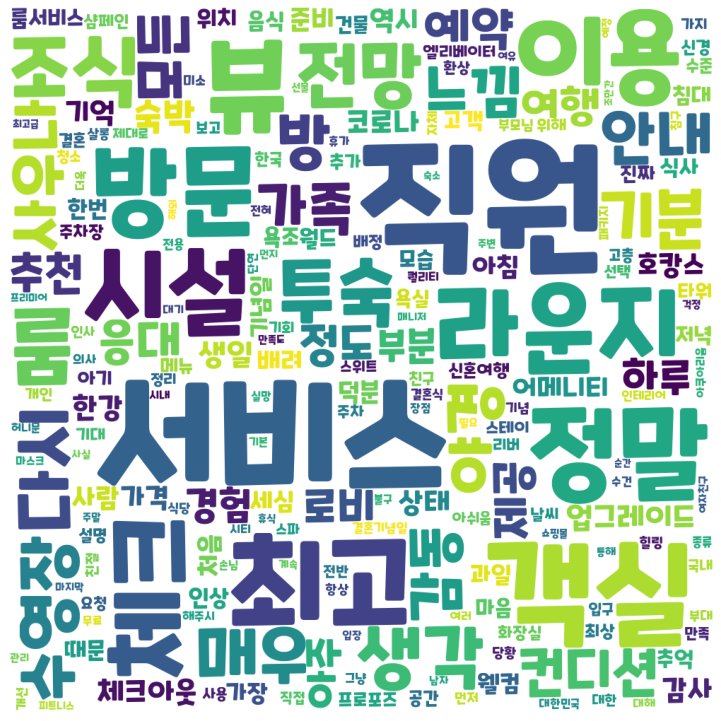

In [35]:
wordCloud = WordCloud(max_font_size=200, font_path='/content/this.ttf', background_color='white', width=1000, height=1000).generate_from_frequencies(totalCount)
plt.figure(figsize=(13, 13))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()